In [7]:
!wget -q '/content/Tiki_scraping.db'

In [8]:
import sqlite3
conn = sqlite3.connect('Tiki_scraping.db')
import pandas as pd
import seaborn as sns

In [9]:
query = '''
SELECT url
FROM categories a

'''
pd.read_sql_query(query, conn)

,url
0,https://tiki.vn/dien-thoai-may-tinh-bang/c1789...
1,https://tiki.vn/tivi-thiet-bi-nghe-nhin/c4221?...
2,https://tiki.vn/thiet-bi-kts-phu-kien-so/c1815...
3,https://tiki.vn/laptop-may-vi-tinh/c1846?src=c...
4,https://tiki.vn/may-anh/c1801?src=c.1801.hambu...
...,...
2649,https://tiki.vn/the-thao/c1975?src=c.1975.hamb...
2650,https://tiki.vn/o-to-xe-may-xe-dap/c8594?src=c...
2651,https://tiki.vn/hang-quoc-te/c17166?src=c.1716...
2652,https://tiki.vn/nha-sach-tiki/c8322?src=c.8322...


In [10]:
query = '''
WITH lowest_sub as 
(SELECT a.id as parent, a.url as url, b.id as child
FROM categories as a
LEFT JOIN categories as b ON a.id = b.parent_id
WHERE child IS NULL)

SELECT parent as id, url
FROM lowest_sub

'''
pd.read_sql_query(query, conn)

,id,url
0,16,https://tiki.vn/dien-thoai-smartphone/c1795?sr...
1,17,https://tiki.vn/dien-thoai-pho-thong/c1796?src...
2,18,https://tiki.vn/dien-thoai-ban/c8061?src=c.178...
3,19,https://tiki.vn/may-doc-sach/c28856?src=c.1789...
4,20,https://tiki.vn/may-tinh-bang/c1794?src=c.1789...
...,...,...
2200,2651,https://tiki.vn/the-thao/c1975?src=c.1975.hamb...
2201,2652,https://tiki.vn/o-to-xe-may-xe-dap/c8594?src=c...
2202,2653,https://tiki.vn/hang-quoc-te/c17166?src=c.1716...
2203,2654,https://tiki.vn/nha-sach-tiki/c8322?src=c.8322...


In [11]:
query = '''
SELECT COUNT(id)
FROM categories
WHERE parent_id <16
GROUP BY parent_id
'''
pd.read_sql_query(query, conn)

,COUNT(id)
0,5
1,11
2,6
3,6
4,10
5,2
6,21
7,13
8,10
9,14


In [12]:
query1 = '''
SELECT * 
FROM categories
LIMIT 2
'''
pd.read_sql_query(query1, conn)

,id,name,url,parent_id,create_at
0,1,Điện Thoại - Máy Tính Bảng,https://tiki.vn/dien-thoai-may-tinh-bang/c1789...,None,2021-04-09 14:52:20
1,2,Điện Tử - Điện Lạnh,https://tiki.vn/tivi-thiet-bi-nghe-nhin/c4221?...,None,2021-04-09 14:52:20


In [13]:
query2 = '''
SELECT * 
FROM products
LIMIT 2'''
pd.read_sql_query(query2, conn)

,id,Product_name,sku,Price,Image,Product_URL,Reviews,Stars,Discount,Tikinow,Freeship,Badge_under_price,Installment,Gift,main_id,create_at
0,1,Điện Thoại Oppo A12 (3GB/32GB) - Hàng Chính Hãng,8020626062208,2490000,https://salt.tikicdn.com/cache/280x280/ts/prod...,https://tiki.vn/dien-thoai-oppo-a12-3gb-32gb-h...,170,4.7,17,1,0,0,0,0,1,2021-04-11 15:38:17
1,2,Điện Thoại Realme C11 (2GB/32GB) - Hàng Chính ...,2480990721662,2149000,https://salt.tikicdn.com/cache/280x280/ts/prod...,https://tiki.vn/dien-thoai-realme-c11-2gb-32gb...,90,4.8,20,1,0,1,0,0,1,2021-04-11 15:38:17


In [14]:
query1 = '''
SELECT c.name as Category, COUNT(p.id) as Number_of_products
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query1, conn)

,Category,Number_of_products
0,Điện Thoại - Máy Tính Bảng,365
1,Điện Tử - Điện Lạnh,1731
2,Phụ Kiện - Thiết Bị Số,1486
3,Laptop - Thiết bị IT,2761
4,Máy Ảnh - Quay Phim,3710
5,Điện Gia Dụng,1761
6,Nhà Cửa Đời Sống,15186
7,Hàng Tiêu Dùng - Thực Phẩm,2189
8,"Đồ chơi, Mẹ & Bé",2423
9,Làm Đẹp - Sức Khỏe,5175


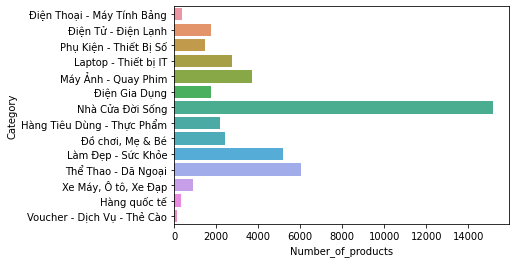

In [15]:
#Total product for each group
query1 = '''
SELECT c.name as Category, COUNT(p.id) as Number_of_products
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id

'''
df = pd.read_sql_query(query1, conn)
sns.barplot(data=df, y='Category', x = 'Number_of_products')

In [16]:
#Most expensive of each group
query2 = '''
SELECT p.Product_name, MAX(p.price) as Most_expensive, c.name as Category
FROM products as p
JOIN categories as c WHERE p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query2, conn)

,Product_name,Most_expensive,Category
0,Surface Pro 6 Intel Core I7 Ram 16GB SSD 1TB (...,55880000,Điện Thoại - Máy Tính Bảng
1,Android Tivi Sharp 8K 80 inch 8T-80AX1X,356390000,Điện Tử - Điện Lạnh
2,Bộ Giải Mã DAC Và Amply Headphone Sennheiser H...,65254000,Phụ Kiện - Thiết Bị Số
3,Thiết bị hội nghị truyền hình Cisco Webex Room...,144100000,Laptop - Thiết bị IT
4,Máy Quay Canon EOS C300 MK II - Hàng Chính Hãng,252000000,Máy Ảnh - Quay Phim
5,Máy làm kem Ý MEHEN M5 2300W - Hàng Nhập Khẩu,150000000,Điện Gia Dụng
6,ĐÀN PIANO ĐIỆN YAMAHA CVP 705,118000000,Nhà Cửa Đời Sống
7,"Quà tặng 2020,chậu sen 6 nhánh mạ vàng 24k",7900000,Hàng Tiêu Dùng - Thực Phẩm
8,Bộ Cờ Tướng Cờ Đồng Cao Cấp // Premium Brass C...,3500000,"Đồ chơi, Mẹ & Bé"
9,Ghế Massage Toàn Thân Cao Cấp OSUN SK-69 Tặng ...,68900000,Làm Đẹp - Sức Khỏe


In [17]:
#Biggest discount items for each category
query4 = '''
WITH discount AS
(SELECT c.name as Category, AVG(Discount) as avg_discount
FROM products as p
JOIN categories as c WHERE p.main_id = c.id
GROUP BY p.main_id)

SELECT Category, MAX(avg_discount) as Max_discount
FROM discount
'''
pd.read_sql_query(query4, conn)

,Category,Max_discount
0,Hàng quốc tế,43.264881


In [18]:
#discount average
query2 = '''
SELECT AVG(p.Discount) as avg_discount, c.name as Category
FROM products as p
JOIN categories as c WHERE p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query2, conn)

,avg_discount,Category
0,22.115068,Điện Thoại - Máy Tính Bảng
1,32.043905,Điện Tử - Điện Lạnh
2,37.724092,Phụ Kiện - Thiết Bị Số
3,25.063021,Laptop - Thiết bị IT
4,30.440431,Máy Ảnh - Quay Phim
5,29.511073,Điện Gia Dụng
6,33.515936,Nhà Cửa Đời Sống
7,19.201005,Hàng Tiêu Dùng - Thực Phẩm
8,22.813867,"Đồ chơi, Mẹ & Bé"
9,27.056039,Làm Đẹp - Sức Khỏe


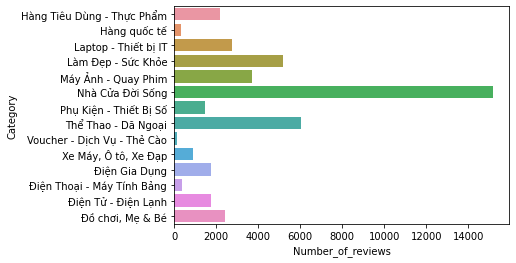

In [19]:
#Number of reviews for each Category
query = '''
SELECT c.name as Category, COUNT(p.Reviews) as Number_of_reviews
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY Category
'''
df  = pd.read_sql_query(query, conn)
sns.barplot(data=df, x ='Number_of_reviews', y ='Category')

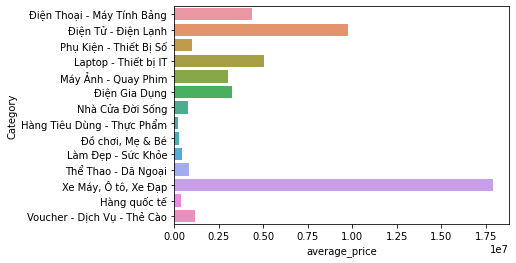

In [20]:
#Average price of each group 
query5 = '''
SELECT AVG(p.price) as average_price, c.name as Category
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id
'''
df = pd.read_sql_query(query5, conn)
sns.barplot(data =df, x = 'average_price', y = 'Category')

In [21]:
query5 = '''
SELECT AVG(p.price) as average_price, c.name as Category
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query5, conn)

,average_price,Category
0,4.379218e+06,Điện Thoại - Máy Tính Bảng
1,9.781150e+06,Điện Tử - Điện Lạnh
2,9.970586e+05,Phụ Kiện - Thiết Bị Số
3,5.059068e+06,Laptop - Thiết bị IT
4,3.026329e+06,Máy Ảnh - Quay Phim
5,3.237169e+06,Điện Gia Dụng
6,7.567388e+05,Nhà Cửa Đời Sống
7,2.145506e+05,Hàng Tiêu Dùng - Thực Phẩm
8,2.608011e+05,"Đồ chơi, Mẹ & Bé"
9,4.511614e+05,Làm Đẹp - Sức Khỏe
